# Preprocesamiento

En esta etapa se toman decisiones en línea con las estadísticas y análisis con tal de  preparar correctamente los datos que serán parte del entrenamiento y posterior validación de los modelos de predicción.

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from nilmtk import DataSet
import warnings
from nilmtk import TimeFrame
warnings. filterwarnings("ignore")
plt.style.use('bmh')



In [3]:
#dataset de referencia DSUALM
deps = DataSet('dsual.h5')

elec=deps.buildings[1].elec # Todos los medidores

labels = pd.DataFrame({'Instances': list(range(1,8)),
                       'Meters': ['Main', 'Boliler', 'Fan', 'Freezer', 'Television','Vacuum Cleaner', 'Light']})
Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x]

## Cambio en el muestreo de datos e interpolación

### Ejemplo seccion faltante

In [4]:
tf=elec[1].good_sections(full_results=True).combined()[0]
tf

TimeFrame(start='2021-11-10 18:08:48+01:00', end='2021-11-10 20:49:17+01:00', empty=False)

Muestreo cada 10 segundos, promediando datos

In [5]:
ta = '2021-11-10 18:08:00+01:00'
tb = '2021-11-10 20:50:00+01:00'
next(elec[1].load(sample_period=10, resample_kwargs={'fill_method':'ffill', 'how': 'mean'}))[ta:tb]

physical_quantity                power    current        pf  frequency  \
type                          reactive                                   
2021-11-10 18:08:40+01:00 -1308.737061   7.308249  0.488543  50.003342   
2021-11-10 18:08:50+01:00 -2171.558838  10.717772  0.519751  50.008118   
2021-11-10 18:09:00+01:00 -2161.488525  10.667108  0.519446  50.023872   
2021-11-10 18:09:10+01:00 -2160.563721  10.655470  0.518934  50.032406   
2021-11-10 18:09:20+01:00 -2161.219482  10.648204  0.517473  50.035877   
...                                ...        ...       ...        ...   
2021-11-10 20:48:30+01:00     2.145291   0.028012  0.467569  50.024227   
2021-11-10 20:48:40+01:00     2.250295   0.028236  0.467536  50.027588   
2021-11-10 20:48:50+01:00     2.287714   0.027557  0.483605  50.018597   
2021-11-10 20:49:00+01:00     2.230673   0.027878  0.489296  50.025021   
2021-11-10 20:49:10+01:00     2.166878   0.028704  0.478156  50.031742   

physical_quantity             voltage        power               
type                                        active     apparent  
2021-11-10 18:08:40+01:00  238.066040   906.642273  1595.331055  
2021-11-10 18:08:50+01:00  237.821381  1324.798828  2543.769531  
2021-11-10 18:09:00+01:00  237.794403  1317.614990  2531.431152  
2021-11-10 18:09:10+01:00  237.860901  1315.249634  2529.410889  
2021-11-10 18:09:20+01:00  237.841766  1310.546387  2527.528809  
...                               ...          ...          ...  
2021-11-10 20:48:30+01:00  240.344788     3.138000     3.832521  
2021-11-10 20:48:40+01:00  240.448044     3.173170     3.906183  
2021-11-10 20:48:50+01:00  240.421127     3.198426     3.945096  
2021-11-10 20:49:00+01:00  240.417679     3.272669     3.981528  
2021-11-10 20:49:10+01:00  240.330750     3.290043     3.959520  

[964 rows x 7 columns]

Muestreo cada 10 segundos, usando el primer dato

In [6]:
ta = '2021-11-10 18:08:00+01:00'
tb = '2021-11-10 20:50:00+01:00'
next(elec[1].load(sample_period=10, resample_kwargs={'fill_method':'ffill', 'how': 'first'}))[ta:tb]

physical_quantity                power    current        pf  frequency  \
type                          reactive                                   
2021-11-10 18:08:40+01:00  -387.110199   3.031838  0.433111  50.003502   
2021-11-10 18:08:50+01:00 -2177.966064  10.737020  0.519002  50.003681   
2021-11-10 18:09:00+01:00 -2163.449951  10.678940  0.519680  50.016178   
2021-11-10 18:09:10+01:00 -2158.406006  10.648400  0.519590  50.031700   
2021-11-10 18:09:20+01:00 -2161.842041  10.654720  0.517675  50.033321   
...                                ...        ...       ...        ...   
2021-11-10 20:48:30+01:00     2.335686   0.027130  0.451781  50.017502   
2021-11-10 20:48:40+01:00     2.520816   0.027855  0.453919  50.029720   
2021-11-10 20:48:50+01:00     2.275950   0.029521  0.455358  50.021061   
2021-11-10 20:49:00+01:00     2.355356   0.027333  0.479606  50.019878   
2021-11-10 20:49:10+01:00     2.317918   0.026614  0.480896  50.030720   

physical_quantity             voltage        power               
type                                        active     apparent  
2021-11-10 18:08:40+01:00  238.323669   309.806488   497.868561  
2021-11-10 18:08:50+01:00  237.908798  1325.751953  2549.736328  
2021-11-10 18:09:00+01:00  237.792191  1319.660034  2534.170654  
2021-11-10 18:09:10+01:00  237.889999  1316.199951  2528.062256  
2021-11-10 18:09:20+01:00  237.796402  1311.609985  2528.612793  
...                               ...          ...          ...  
2021-11-10 20:48:30+01:00  240.274002     2.941648     3.774932  
2021-11-10 20:48:40+01:00  240.351410     3.036490     3.958235  
2021-11-10 20:48:50+01:00  240.485397     3.223646     3.968148  
2021-11-10 20:49:00+01:00  240.417007     3.151386     3.937321  
2021-11-10 20:49:10+01:00  240.395401     3.080090     3.856614  

[964 rows x 7 columns]

# Obtener los datos del medidor principal  cada 60 segundos.

Además del parámetro sample_period=60, requerido para cambiar el muestreo a un minuto, se ha especificado como método (how) de cambio de muestreo el que provee NILMTK por defecto (mean). En el mismo diccionario resample_kwargs se ha especificado el parámetro fill_method el cual corresponderá al método elegido para rellenar los huecos. En este caso se especifica el método ffill el cual, ante un hueco, rellenará los datos faltantes hacia adelante con el valor inmediatamente anterior a la serie de tiempo

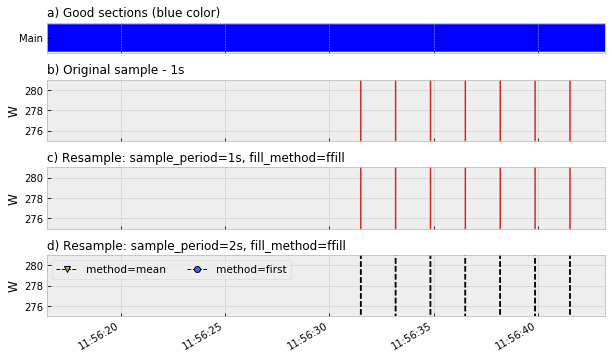

In [12]:
rcParams['figure.figsize'] = (10, 6)

ta = '2021-11-10 18:08:00+01:00'
tb = '2021-11-10 20:50:00+01:00'


Main=elec.select(instance=[1])
fig, (ax4, ax1, ax2, ax3) = plt.subplots(4, 1, sharex=True,
                                         gridspec_kw={'hspace': 0.5,'height_ratios':[1.5, 3, 3, 3]})

elec[1].power_series_all_data()[ta:tb].plot(ax=ax1, color='tab:red', marker="o", lw=1.5)
ax1.minorticks_off()
ax1.set_ylabel('W')
ax1.set_title('b) Original sample - 1s', fontsize=12, loc='left')
ax1.annotate("|11:56:25 = 277 W", xy=('2021-11-10 18:08:00+01:00', 277.6),rotation=7)
ax1.set_ylim(275,281)

elec[1].power_series_all_data(sample_period=1, resample_kwargs={'fill_method': 'ffill'})[ta:tb].plot(ax=ax2, marker="o", color='tab:red',lw=1.5)
ax2.minorticks_off()
ax2.set_ylabel('W')
ax2.set_title('c) Resample: sample_period=1s, fill_method=ffill', fontsize=12, loc='left')
ax2.annotate("|11:56:26 = 277 W", xy=('2021-11-10 18:08:00+01:00', 277.6))
ax2.set_ylim(275,281)

elec[1].power_series_all_data(sample_period=4,resample_kwargs={'how': 'first'})[ta:tb].plot(ax=ax3, color='k', lw=1.5, ls='--', marker="o",
                                                           markersize=8, markerfacecolor='royalblue')
elec[1].power_series_all_data(sample_period=4, resample_kwargs={'how': 'mean'})[ta:tb].plot(ax=ax3, color='k', lw=1.5, ls='--', marker="v",
                          markersize=8, markerfacecolor='y')
ax3.minorticks_off()
ax3.set_ylabel('W')
ax3.set_title('d) Resample: sample_period=2s, fill_method=ffill', fontsize=12, loc='left')
ax3.set_ylim(275,281)

import matplotlib.lines as mlines
line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=6, markerfacecolor='royalblue', label='method=first')
line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6, markerfacecolor='y', label='method=mean')
ax3.legend(handles=[line2, line1], fontsize=10.5, ncol=2)
ax4=Main.plot_good_sections(ax=ax4)
ax4.set_yticklabels(list(Meters.values()))
ax4.grid(axis='y')
ax4.set_title('a) Good sections (blue color)', fontsize=12, loc='left')
l=['11:56:20','11:56:25','11:56:30','11:56:35','11:56:40','11:56:45','11:56:50']
ax4.set_xticklabels(l, rotation=30, ha='right')

#guarda gráfico
plt.savefig('./data/images/paso3/3.1_Prepros_1.svg', bbox_inches='tight', transparent=True)
pass

## Filtros de dispositivos eléctricos

In [13]:
Devices=elec.select(instance=[2,3,4,5,6,7]) #MeterGroup de dispositivos
d=Devices.energy_per_meter().loc['active']  #energía kWh
d[d>5.85] #filtra dispositivos menores o iguales a 5.85 kWh (5% consumo)

6/6 ElecMeter(instance=7, building=1, dataset='DSUAL', appliances=[Appliance(type='light', instance=1)])ance=1)])

Series([], Name: active, dtype: float64)

*top-k*

In [14]:
Devices = elec.select(instance=[2,3,4,5,6,7])
Devices.select_top_k(k=5)

6/6 ElecMeter(instance=7, building=1, dataset='DSUAL', appliances=[Appliance(type='light', instance=1)])ance=1)])

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='boiler', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])
)

## División del dataset

- train: conjunto de datos de entrenamiento de modelos de desagregación
- test: conjunto de datos de validación y pruebas de modelos de desagregación

Entrenamiento:

In [62]:
train = DataSet('dsual.h5')

#train.set_window(start="2021-11-11 17:39:00", end="2021-11-11 17:40:00")
train.set_window(start="2021-11-10 18:08:00", end="2021-11-10 20:49:00")

train_elec=train.buildings[1].elec

train_elec.get_timeframe()

TimeFrame(start='2021-11-10 18:08:48+01:00', end='2021-11-10 20:49:00+01:00', empty=False)

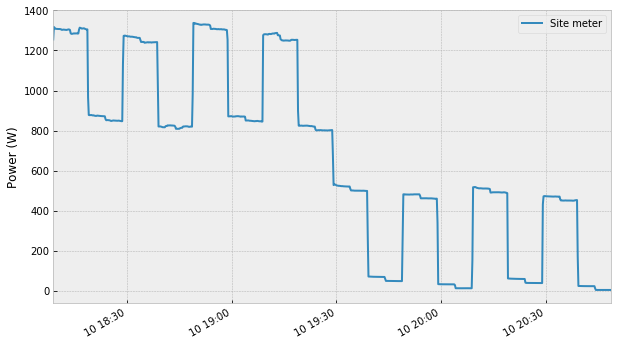

In [57]:
train_elec.plot()
#no hay datos train_elec.submeters().plot()



Validación:

In [59]:
 #Validación 

valid = DataSet('dsual.h5')

#valid.set_window(start="2021-11-10 18:08:00", end="2021-11-10 20:00:00")
valid.set_window(start="2021-11-10 18:08:00", end="2021-11-10 20:00:00")
valid_elec=valid.buildings[1].elec

valid_elec.get_timeframe()

TimeFrame(start='2021-11-10 18:08:48+01:00', end='2021-11-10 20:00:00+01:00', empty=False)

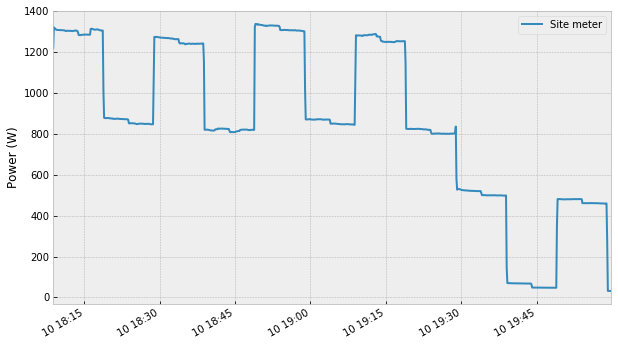

In [60]:
valid_elec.mains().plot()
valid_elec.submeters().plot()

Pruebas

In [50]:


#test=DataSet('C:/data/DEPS.h5') #Pruebas

test = DataSet('dsual.h5')

test.set_window(start="2021-11-10 20:00:00", end="2021-11-10 20:50:00")
test_elec=test.buildings[1].elec

test_elec.get_timeframe()

TimeFrame(start='2021-11-10 20:00:00+01:00', end='2021-11-10 20:49:17+01:00', empty=False)

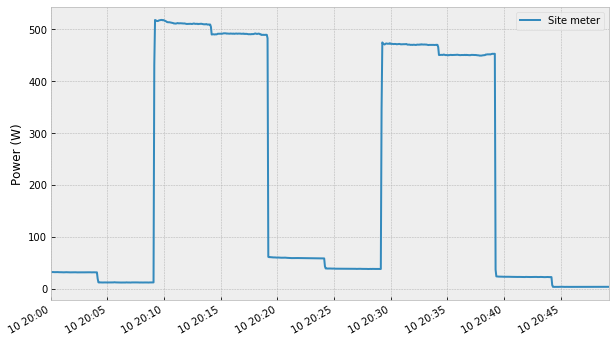

In [51]:
test_elec.mains().plot()